# The Spark Foundation
# Task 1:

# Predict the percentage of student based on no. of study hours.

 Importing python library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Importing dataset

In [2]:
data= pd.read_csv("C:\\Users\\Nikita\\Downloads\\sdata.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


EDA

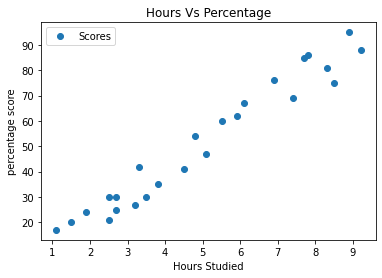

In [3]:
data.plot(x="Hours",y="Scores",style="o")
plt.title("Hours Vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("percentage score")
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

<AxesSubplot:ylabel='Scores'>

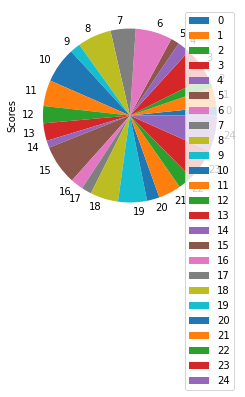

In [4]:
data.plot.pie(x="Hours",y="Scores")

<AxesSubplot:xlabel='Hours'>

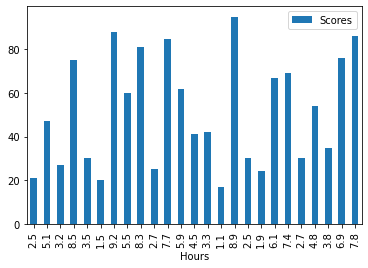

In [5]:
data.plot.bar(x="Hours",y="Scores")

<AxesSubplot:xlabel='Hours'>

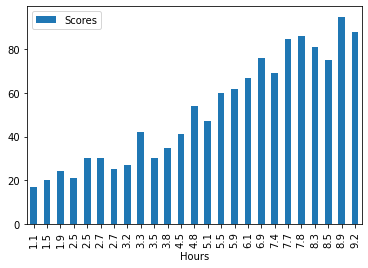

In [6]:
data.sort_values(["Hours"], axis=0,
                ascending =[True],inplace=True)
data.head(10)
data.plot.bar(x="Hours",y="Scores")

After ploting different graph, we found that as Study Hours increases,Scores also increases.

# Preparing the data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [7]:
X=data.iloc[:, :-1].values
y= data.iloc[:, 1].values


Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [8]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

# Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [9]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.") 

Training complete.


# Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [10]:
print(X_test)
print("Prediction of Score")
y_pred = regressor.predict(X_test) # Predicting the scores
print(y_pred)

[[2.7]
 [1.9]
 [7.7]
 [6.1]
 [4.5]]
Prediction of Score
[28.6177145  20.88803334 76.92822173 61.46885942 46.0094971 ]


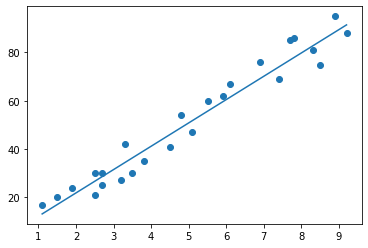

In [11]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [12]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,30,28.617714
1,24,20.888033
2,85,76.928222
3,67,61.468859
4,41,46.009497


In [13]:
# You can also test with your own data
hours=[[9.25]]
pred=regressor.predict(hours)
print(pred)

[91.90447898]


# Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [14]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.621333622532768
